<a href="https://colab.research.google.com/github/caseychoi/HelloWorld/blob/main/cup-detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi


Fri Aug  8 20:46:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   67C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 43.1/112.6 GB disk)


In [6]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=outputs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 918, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {list(MODES)}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=outputs'. Valid modes are ['predict', 'export', 'track', 'benchmark', 'val', 'train'].

    Arguments received: ['yolo', 'mode=outputs']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ['pose', 'classify', 'detect', 'segment', 'obb']
                MODE (required) is one of ['predict', 'export', 'track', 'benchmark', 'val', 'train']
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train 

In [7]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'


Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 40.1ms
Speed: 12.0ms preprocess, 40.1ms inference, 331.1ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


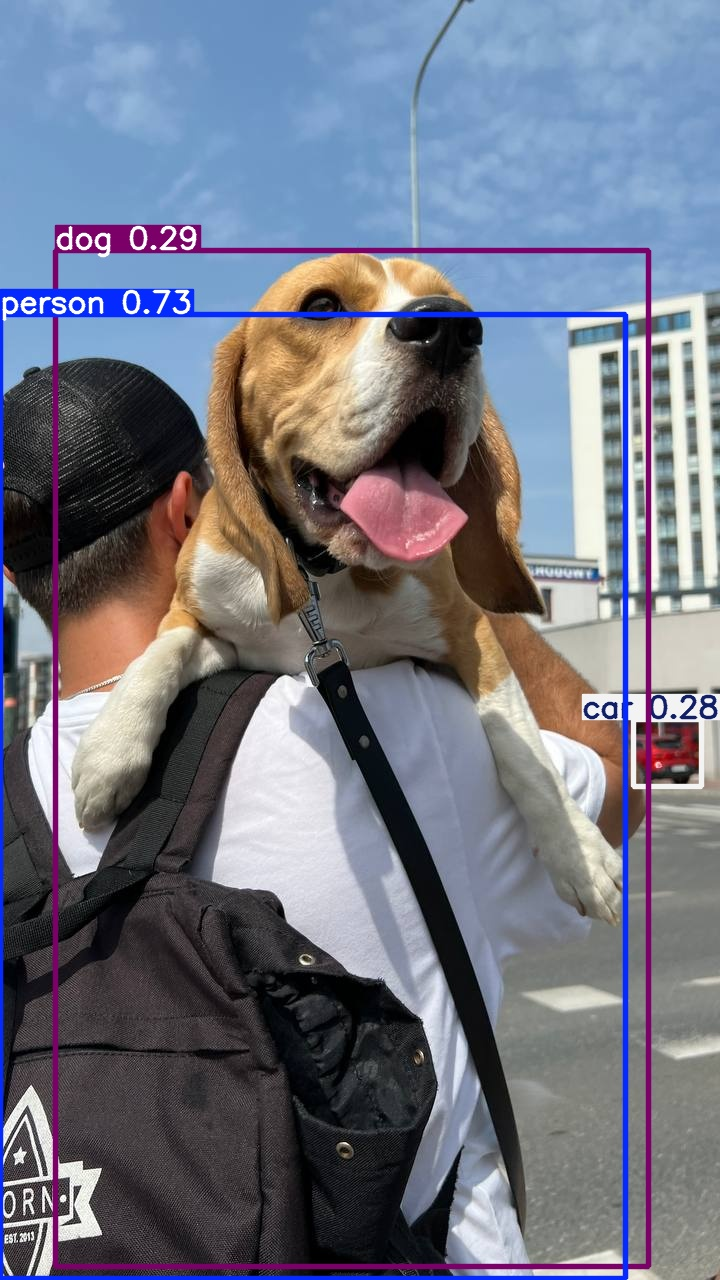

In [11]:
Image(filename='/content/runs/detect/predict/dog.jpg', height=600)

In [ ]:
import os
print(os.listdir('runs/detect/predict'))

In [14]:
!pip install roboflow --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 98.6 MB/s eta 0:00:00


In [15]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qdz7NBAvnyARDrasth6y")
project = rf.workspace("egkonws").project("cups-lvh2c")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cups-1 in yolov8:: 100%|██████████| 108/108 [00:00<00:00, 9387.90it/s]


In [16]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=30 imgsz=640


Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/cups-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

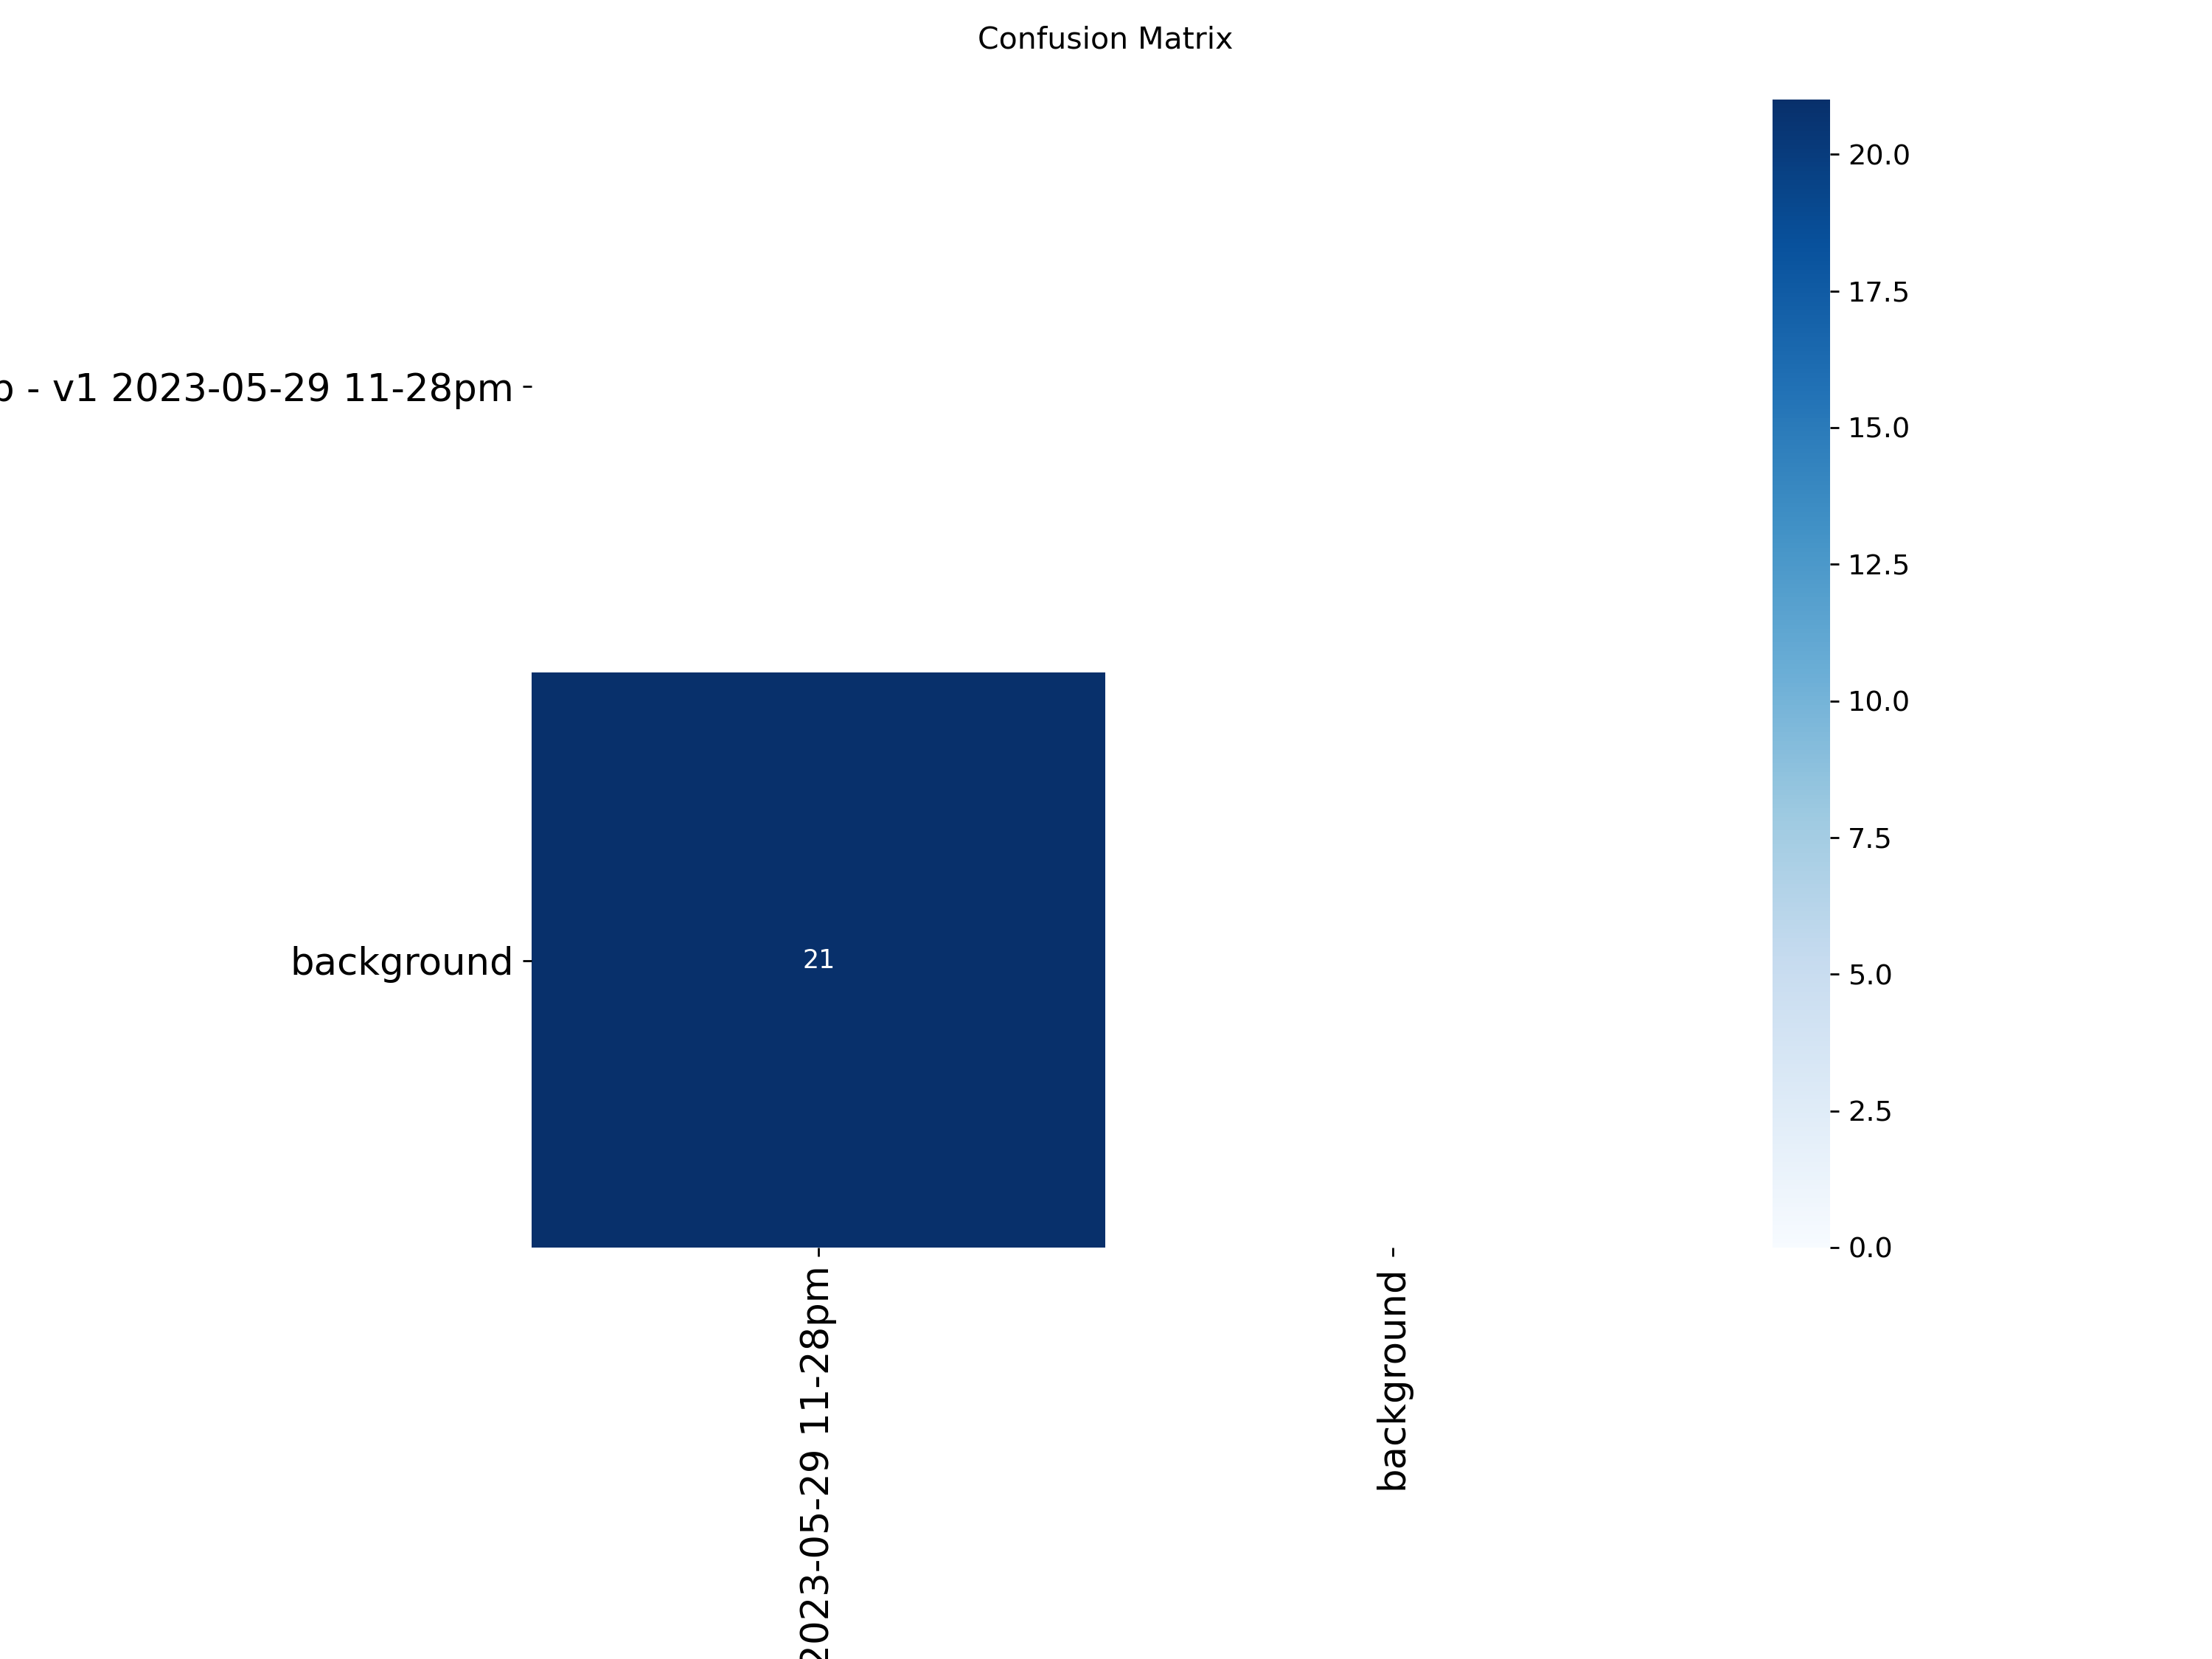

In [17]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', height=600)

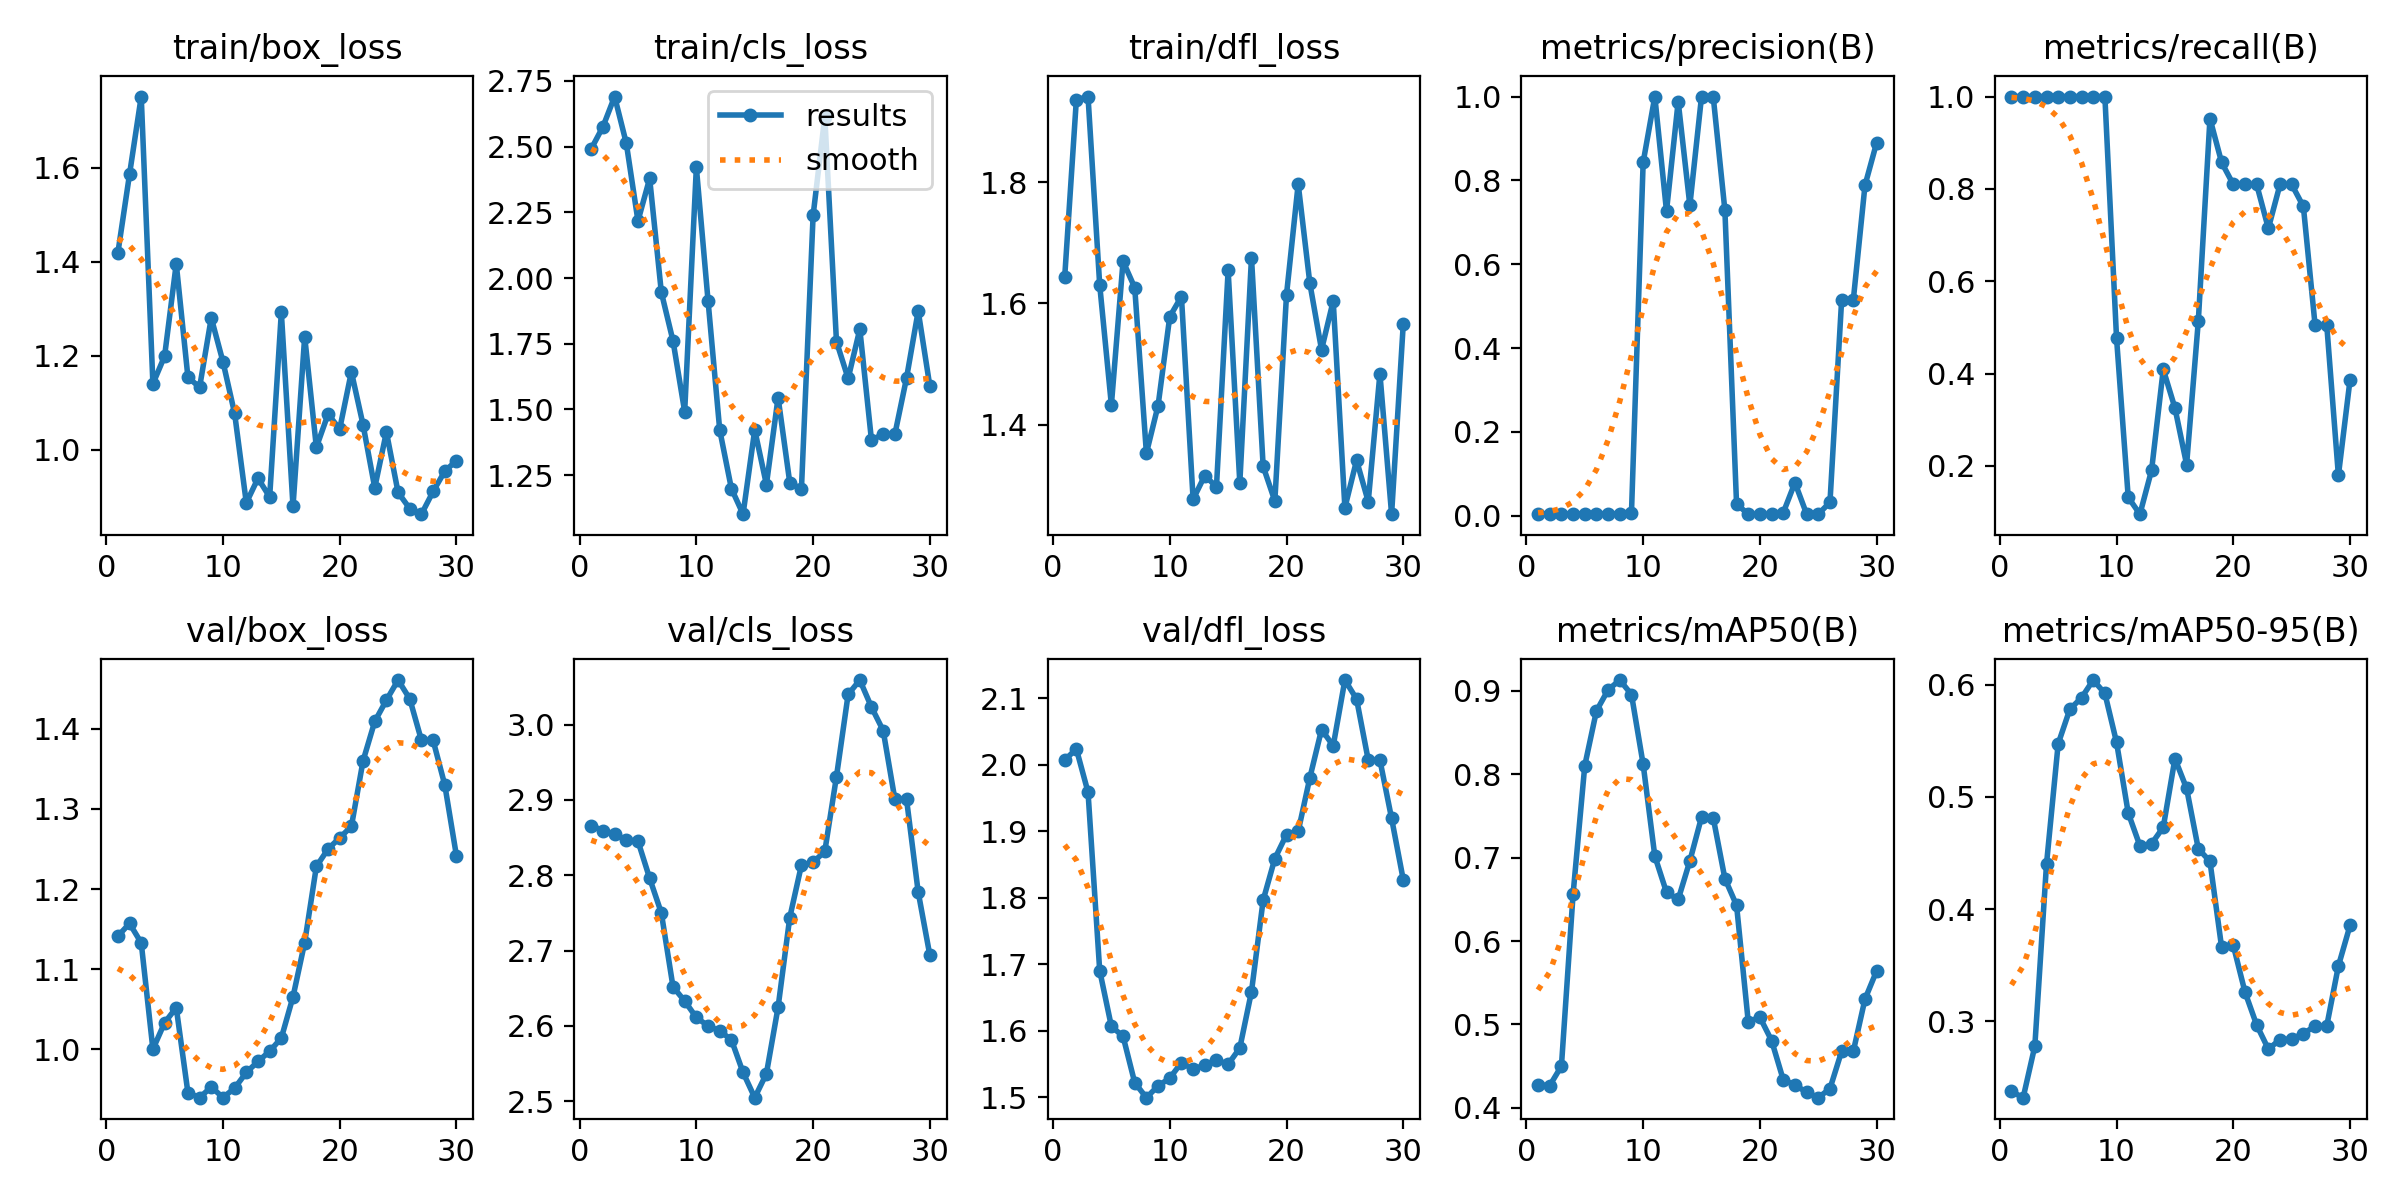

In [18]:
Image(filename=f'/content/runs/detect/train/results.png', height=600)

In [19]:
!yolo task=detect mode=eval model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 918, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {list(MODES)}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<built-in function eval>'. Valid modes are ['val', 'benchmark', 'predict', 'track', 'train', 'export'].

    Arguments received: ['yolo', 'task=detect', 'mode=eval', 'model=/content/runs/detect/train/weights/best.pt', 'data=/content/cups-1/data.yaml']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ['detect', 'pose', 'classify', 'segment', 'obb']
                MODE (required) is one of ['val', 'benchmark', 'predict', 'track', 'train', 'export']
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override def

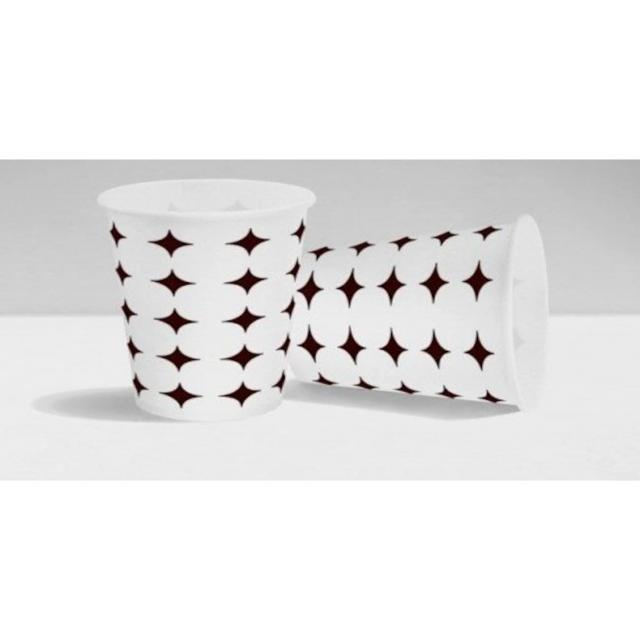

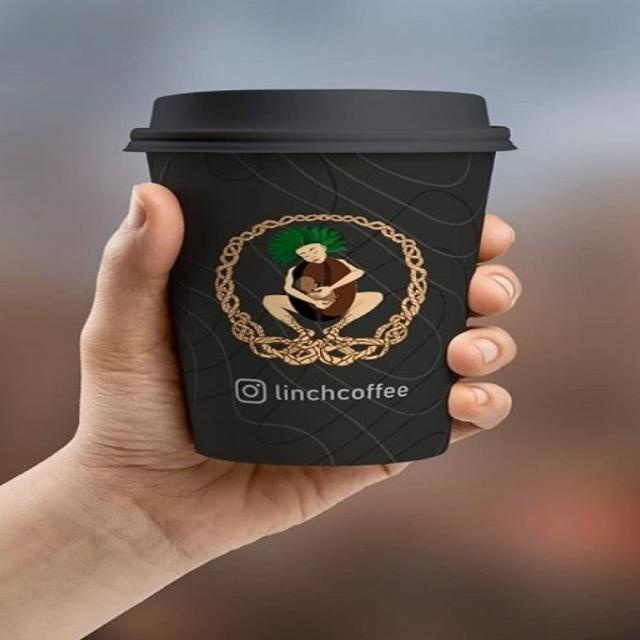

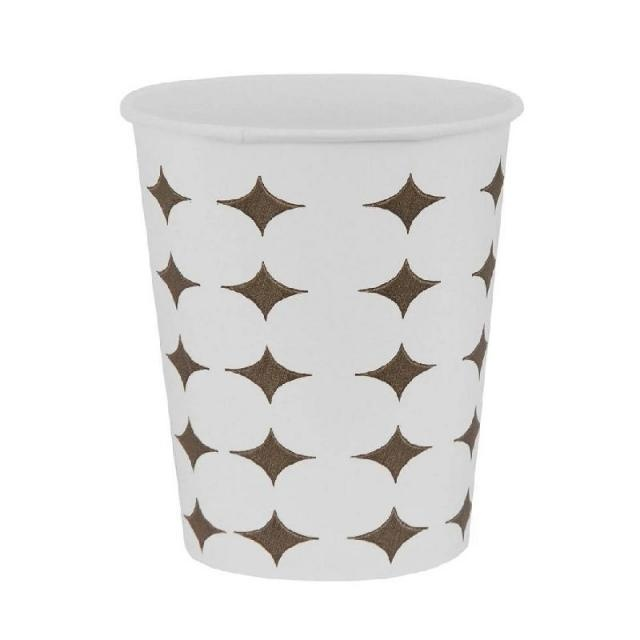

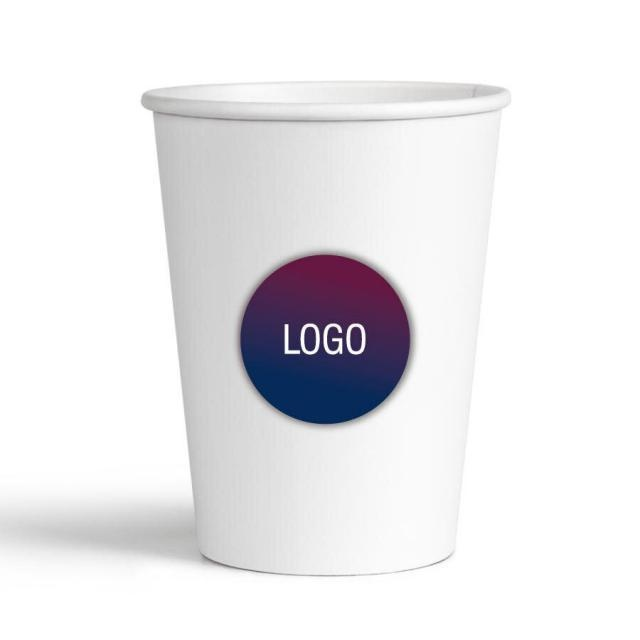

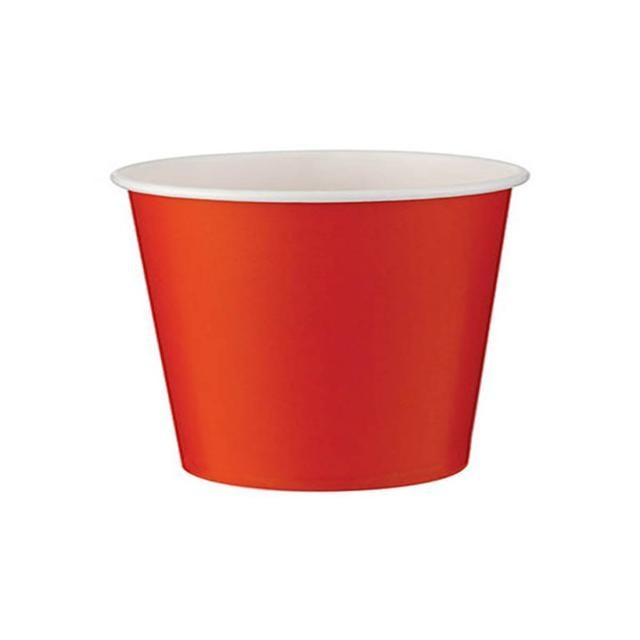

In [27]:
import glob
from IPython.display import Image, display
for image_path in glob.glob('/content/runs/detect/predict2/*.jpg')[:5]:
  display(Image(filename=image_path, height=600))
  print("\n")

In [23]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/14 /content/cups-1/test/images/1000x1000-1_jpg.rf.f55f7fa1a397cc7227ff1a739b597752.jpg: 640x640 (no detections), 7.4ms
image 2/14 /content/cups-1/test/images/10328681775154_jpg.rf.f4798c93ee9ba582298556a275c5d065.jpg: 640x640 (no detections), 7.4ms
image 3/14 /content/cups-1/test/images/7-oz-karton-bardak-100-lu-kcm6704961-1-71ebbb3e1d5b425a9adc22e7bc983941_jpg.rf.d1db061a521c61f122698fe6b2e6ee74.jpg: 640x640 (no detections), 7.3ms
image 4/14 /content/cups-1/test/images/7-oz-yildiz-desenli-karton-bardak-logolu_jpg.rf.41433b490ff5c788e035ea2f92e15d28.jpg: 640x640 (no detections), 7.3ms
image 5/14 /content/cups-1/test/images/Logo-Baskili-Karton-Bardak-600x870h_jpg.rf.0dd94ab4294cdf831aa5711f380c2bd0.jpg: 640x640 (no detections), 7.3ms
image 6/14 /content/cups-1/test/images/Y100E_61k4-4j_jpg.rf.48e8ac89d901994e7ba6694a6